# Aggregated Residual Transformations for Deep Neural Networks
---
* [링크](https://arxiv.org/abs/1611.05431)
* ILSVRC(ImageNet Large Scale Visual Recognition Challenge) 2016 대회에서 2등을 차지한 모델.
    * Resnet의 발전 버전.

## Introduce
---
* 간단한 불록을 반복해서 쌓은 구조.
* homogeneous하고, 다중 분기 구조.
    * 각 레이어나 노드가 유사한 특성을 지님.
    * 하이퍼파라미터 수가 적음.
* **Cardinality**라는 새로운 개념이 등장.
    * 기존의 네트워크에서는 깊이(레이어의 수)와 폭(레이어의 노드 수)가 주요 성는 결정 요소
    * 더 정교하고 효율적 모델 구축.


## Block
---
* VGGNet과 ResNet과 같이 동일한 형태의 Block을 깊게 쌓는 것은 특정 데이터 셋에 하이퍼파라미터를 과도하게 적응하는 위험을 줄임.
    * 특정 데이터 셋에 과정합 방지 및 일반화 능력을 향상.
    * 모델의 복잡성을 줄이고 모델의 성능 향상에 도움.
* VGG구조  
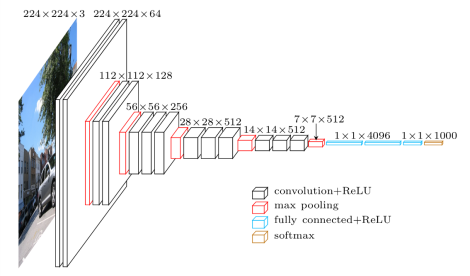
* ResNet구조  
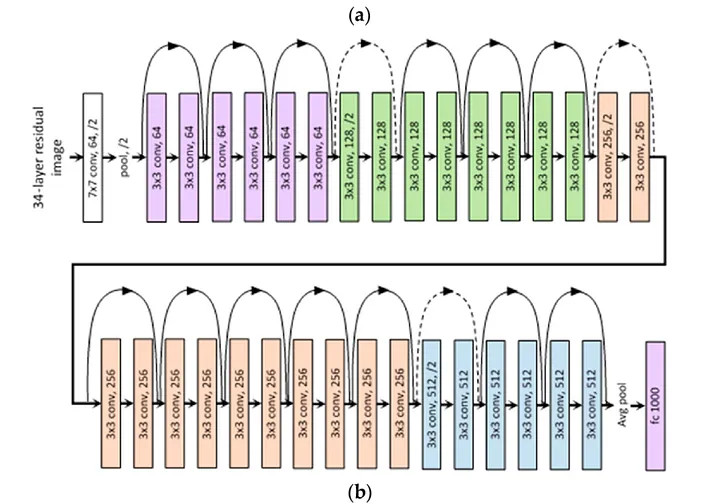

</br>

* Inception은 신중하게 설계된 토폴로지가 복잡한 계산 없이도 높은 정확도를 달성.
    * **'split-transform-merge(분할-변환-병합)'**
    * 하지만 새로운 데이터셋에 적응시킬 때, 특히 하이퍼파라미터가 많을 때는 어떻게 
    할지 명확하지 않음.
* Incetion 구조  
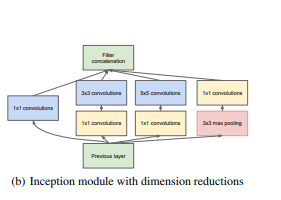

</br>

* VGG/ResNet의 레이어를 반복하는 전략을 채택하고 split-transform-merge을 쉽고 확장 가능 한 방식으로 활용한 간단한 Architecture를 제시.


## Architecture
---

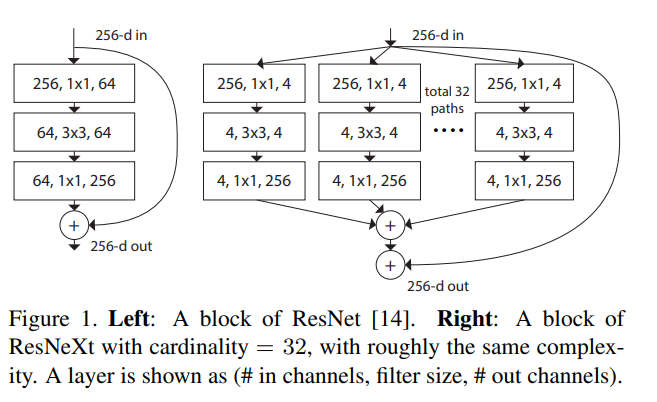

</br>

* 간단히 보면 Inception + shortcut와 유사
* 모든 경로가 동일한 토폴로지를 공유.
* 깊이와 너비를 늘리는 과정이 쉬움.
* 카디널리티 : 채널 수를 몇 개의 그룹으로 분할하는지를 조절하는 하이퍼파라미터
* 특징
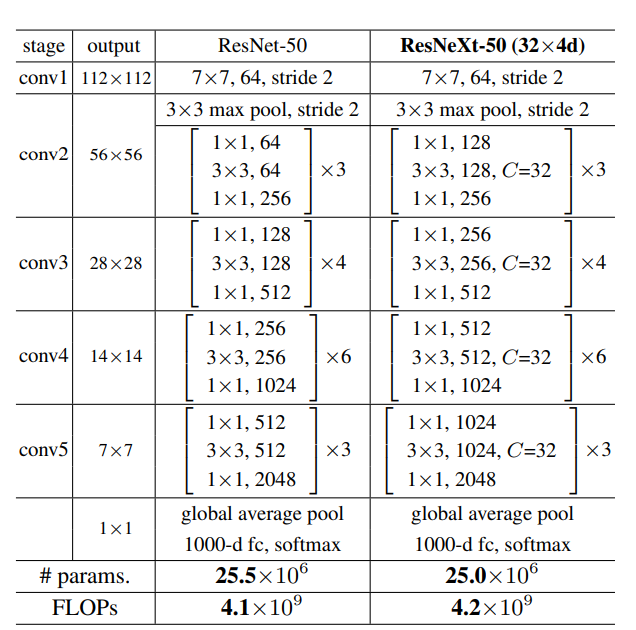



## Rules
---
* VGG/ResNet에서 영감 받아 비슷한 방식 architecture를 구성
* 총 두가지의 규칙으로 생성.
    * 최대한 모든 불록이 대략적으로 같은 계산량(FLOPs)를 가지도록 보장.
* Rule 1:
    * spatial maps(feature map)이 크기가 같은 경우(입력과 출력의 해상도가 같은 경우) 블록들이 동일한 하이퍼파라미터(불록의 너비의 필터 크기)를 공유.
* Rule 2:
    * spatial map이 두배로 다운샘플링 되면(해상도가 절반으로 줄어들면), 불록의 너비가 두배가 됨
    * 정보 손실 보상 및 블록의 계산 복잡성 일정하게 유지.